# Voltage Reflection Coefficient
## Example E15 in NIST 1900

This example demonstrates using complex numbers with suncal. A single equation is entered, but the `ModelComplex` class breaks it and the input variables into real and imaginary components before solving for the uncertainty.

Because input parameters S22, S12, S23, and S13 are given in magnitude and phase, the `measure_magphase` method should be used to enter them correctly so their respective uncertainties are properly converted to real and imaginary form for calculation.

In [1]:
from suncal.uncertainty import ModelComplex, ModelComplexCallable

In [2]:
model = ModelComplex('Gamma = S22 - S12*S23/S13')

# Enter s-parameters from Exhibit 22 table in NIST 1900. Values and uncertainties given
# in magnitude/phase, so use set_input_magph() methods.
model.var('S22').measure_magphase(.24776, 4.88683, .00337, .01392, k=1, degrees=False)
model.var('S12').measure_magphase(.49935, 4.78595, .00340, .00835, k=1, degrees=False)
model.var('S23').measure_magphase(.24971, 4.85989, .00170, .00842, k=1, degrees=False)
model.var('S13').measure_magphase(.49952, 4.79054, .00340, .00835, k=1, degrees=False)
result = model.calculate()
result

|Function   | Method       | Nominal         | Standard Uncertainty   | Correlation  |
|----------|------------|---------------|----------------------|-------------|
|Gamma      | GUM          | 0.0074+0.0031j  | ± 0.0045+0.0045j       | 0.0321       |
|Gamma      | Monte Carlo  | 0.0074+0.0031j  | ± 0.0045+0.0045j       | 0.0316       |

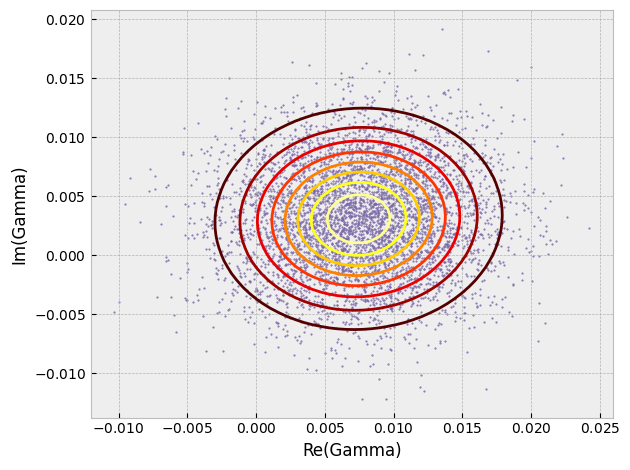

In [3]:
# Compare to Exhibit 23 (left) in NIST-1900
# Contours are GUM solution, points are Monte Carlo samples
result.report.plot(polar=False);

### Magnitude/Phase Output

The above calculation provides output values in real and imaginary components. For magnitude and phase outputs, set the `magphase` argument to True. The uncertainties will be properly converted to magnitude and phase values.

In [4]:
model = ModelComplex('Gamma = S22 - S12*S23/S13', magphase=True)
model.var('S22').measure_magphase(.24776, 4.88683, .00337, .01392, k=1, degrees=False)
model.var('S12').measure_magphase(.49935, 4.78595, .00340, .00835, k=1, degrees=False)
model.var('S23').measure_magphase(.24971, 4.85989, .00170, .00842, k=1, degrees=False)
model.var('S13').measure_magphase(.49952, 4.79054, .00340, .00835, k=1, degrees=False)
result = model.calculate()
result

|Function   | Method       | Nominal         | Standard Uncertainty   | Correlation  |
|----------|------------|---------------|----------------------|-------------|
|Gamma      | GUM          | 0.0081 ∠22 rad  | ± 0.0050 ∠32 rad       | -0.0525      |
|Gamma      | Monte Carlo  | 0.0096 ∠22 rad  | ± 0.0043 ∠43 rad       | 0.0162       |

Or in degrees:

In [5]:
result.degrees(True)

|Function   | Method       | Nominal      | Standard Uncertainty   | Correlation  |
|----------|------------|------------|----------------------|-------------|
|Gamma      | GUM          | 0.0081 ∠22°  | ± 0.0050 ∠32°          | -0.0525      |
|Gamma      | Monte Carlo  | 0.0096 ∠22°  | ± 0.0043 ∠43°          | 0.0162       |

### Plot options

Various plotting options are available for visualizing the joint distribution of the output.

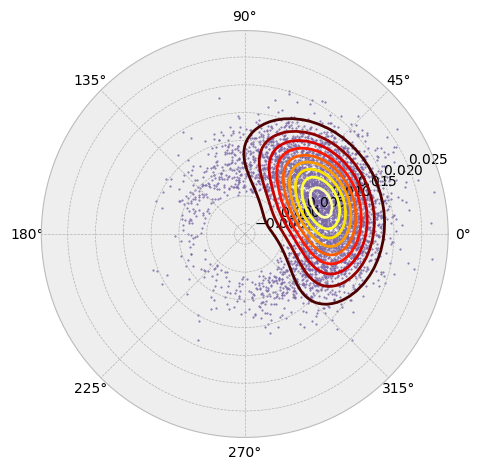

In [6]:
result.report.plot()

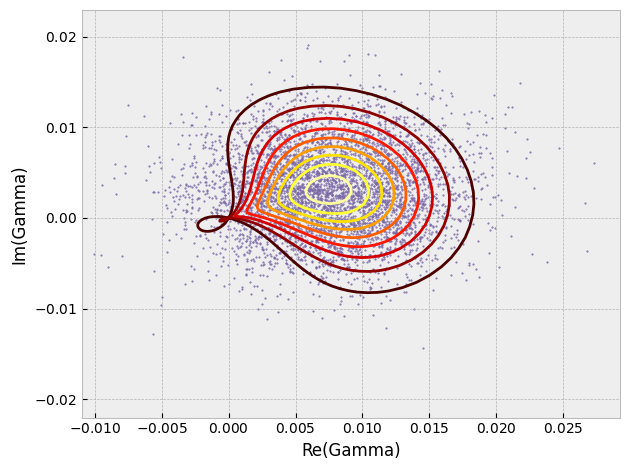

In [7]:
# Compare Monte Carlo (purple dots) to Exhibit 23 (right) in NIST-1900.
# Use polar=False to plot phase vs. magnitude rather than polar form.
result.report.plot(polar=False);

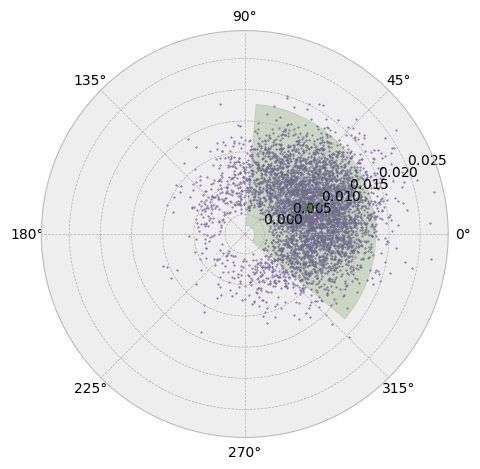

In [8]:
# Plot GUM as shaded region. Result would be interpreted as this region if only magnitude/phase uncertainties 
# are considered with no correlation.
result.report.plot(gumcontour=False, mccontour=False);

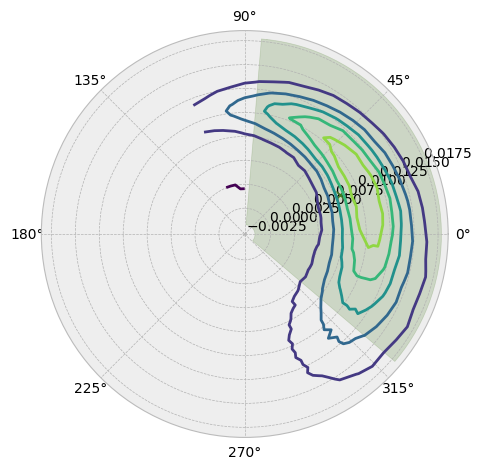

In [9]:
result.report.plot(gumcontour=False, mccontour=True);

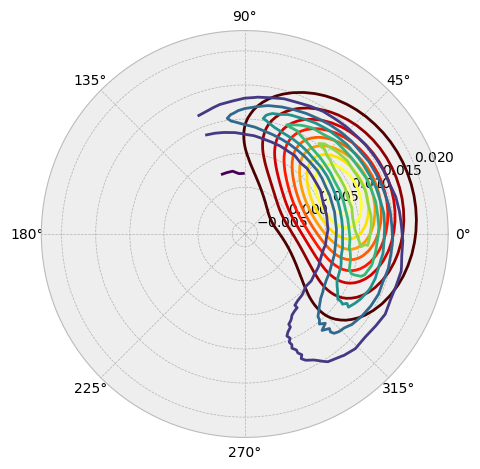

In [10]:
result.report.plot(gumcontour=True, mccontour=True);

### Full system

The UncertComplex class wraps a normal UncertCalc class with extra equations for real, imaginary, magnitude, and phase components. The full output of the calculation can be accessed through the `fullout` property. For example, the below statement displays the complete system of equations for which uncertainty is calculated.

In [11]:
result.report.fullreport.gum.model()

## Faster with a function

The above Gamma calculation provides the symbolic solution, but is quite slow due to the number of symbolic derivatives and algebraic manipulations that must be done. The same calculation can be done using a Python function, with much faster results, but no symbolic result.

In [12]:
def gamma(S22, S12, S23, S13):
    return S22 - S12 * S23 / S13

u = ModelComplexCallable(gamma, magphase=True)
u.var('S22').measure_magphase(.24776, 4.88683, .00337, .01392, k=1, degrees=False)
u.var('S12').measure_magphase(.49935, 4.78595, .00340, .00835, k=1, degrees=False)
u.var('S23').measure_magphase(.24971, 4.85989, .00170, .00842, k=1, degrees=False)
u.var('S13').measure_magphase(.49952, 4.79054, .00340, .00835, k=1, degrees=False)
result = u.calculate().degrees(True)
result

|Function   | Method       | Nominal      | Standard Uncertainty   | Correlation  |
|----------|------------|------------|----------------------|-------------|
|gamma      | GUM          | 0.0081 ∠22°  | ± 0.0050 ∠32°          | -0.0525      |
|gamma      | Monte Carlo  | 0.0096 ∠22°  | ± 0.0043 ∠43°          | 0.0159       |